This notebook generates the following panels:
- ( ) Summary: distribution of depth preferences of all cells

use env 2p_analysis_cottage

In [2]:
VERSION = 1

In [3]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import defopt
import pickle
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
mpl.rcParams['pdf.fonttype'] = 42 # save text as text not outlines
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings

from cottage_analysis.depth_analysis.filepath import generate_filepaths
from cottage_analysis.stimulus_structure.sphere_structure import *
from cottage_analysis.depth_analysis.depth_preprocess.process_params import create_speed_arr, create_trace_arr_per_roi, calculate_OF, thr
from cottage_analysis.depth_analysis.plotting.plotting_utils import *
from cottage_analysis.depth_analysis.plotting.basic_vis_plots import *

In [6]:
save_root = '/camp/lab/znamenskiyp/home/shared/presentations/Cosyne2023/ver'+str(VERSION)+'/preferred_depth_distribution/'
if not os.path.exists(save_root):
    os.makedirs(save_root)

rawdata_root = '/camp/lab/znamenskiyp/data/instruments/raw_data/projects/'
root = '/camp/lab/znamenskiyp/home/shared/projects/'
project = 'hey2_3d-vision_foodres_20220101'
protocol = 'SpheresPermTubeReward'
V1_sessions = [['S20220512','S20220511','S20220429','S20220419','S20220426','S20220506','S20220503','S20220505','S20220516'],['S20220504','S20220426','S20220421','S20220419','S20220505','S20220503','S20220510','S20220512','S20220511']]
summary_dir = root+'/'+project+'/Analysis/summary/'
# V1 150: ['S20220512','S20220511','S20220429']['S20220504','S20220426','S20220421']
# V1 200: ['S20220419','S20220426','S20220506']['S20220419','S20220505','S20220503']
# V1 250: ['S20220503','S20220505','S20220516']['S20220510','S20220512','S20220511']

mouses = ['PZAH6.4b','PZAG3.4f']
depth_list = [0.06, 0.19, 0.6, 1.9, 6]
depth_thr_min = 0.019
depth_thr_max = 19

all_results = pd.DataFrame(columns=['ROI','preferred_depth_idx','log_amplitude','xo_logged','yo_logged','log_sigma_x2','log_sigma_y2','theta','offset','r_sq','preferred_depth_max','preferred_depth_gaussian'])
for k in range(len(V1_sessions)):
    mouse = mouses[k]
    for session in V1_sessions[k]:
            
            # ----- STEP1: Generate file path -----
            print('---START STEP 1---', '\n', 'Getting data filepaths...', flush=True)
            rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
                project=project,
                mouse=mouse,
                session=session,
                protocol=protocol,
                rawdata_root=rawdata_root,
                root=root)
#             print(rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder, flush=True)

            filename = analysis_folder/('plane0/gaussian_blob_fit_new_'+str(0.1)+'.pickle')
            filename2 = analysis_folder/('plane0/gaussian_depth_tuning_fit_new_'+str(0.5)+'.pickle')
            with open(filename, 'rb') as handle:
                results_blob = pickle.load(handle)
            with open(filename2, 'rb') as handle:
                results_depth = pickle.load(handle)

            # Load suite2p files
            ops = np.load(suite2p_folder/'ops.npy', allow_pickle=True)
            ops = ops.item()
            iscell = np.load(suite2p_folder/'iscell.npy', allow_pickle=True)[:, 0]
            F = np.load(trace_folder/'F.npy', allow_pickle=True)
            Fast = np.load(trace_folder/'Fast.npy', allow_pickle=True)

            # All_rois
            which_rois = (np.arange(F.shape[0]))[iscell.astype('bool')]

            # Load depth neurons
            depth_neurons = np.load(analysis_folder/('plane0/depth_neurons.npy'))
            max_depths = np.load(analysis_folder/('plane0/max_depths_index.npy'))
            
            
            # Append info to all_results
            results_blob['preferred_depth_gaussian']=np.exp(results_depth['x0_logged'].astype('float64'))
            results_blob['preferred_depth_max'] = [depth_list[int(max_depth)]*100 for max_depth in results_blob['preferred_depth_idx']]
            all_results = pd.concat([all_results,results_blob], ignore_index=True)
            print(session)
            
with open(save_root+'gaussian_fit_summary.pickle', 'wb') as handle:
    pickle.dump(all_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

/camp/home/hey2/.conda/envs/2p_analysis_cottage/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220512
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220511
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220429
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220419
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220426
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220506
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220503
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220505
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220516
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220504
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220426
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220421
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220419
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220505
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220503
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220510
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220512
---START STEP 1--- 
 Getting data filepaths...


<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: rawdata_root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
<ipython-input-6-80a7731c9d60>:27: DeprecationWarning: root will be read from flexiznam config. Remove parameter
  rawdata_folder, protocol_folder, analysis_folder, suite2p_folder, trace_folder = generate_filepaths.generate_file_folders(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:160: DeprecationWarning: flexilims_session will become mandatory
  sess_children = get_session_children(
/nemo/lab/znamenskiyp/home/users/hey2/codes/cottage_analysis/cottage_analysis/depth_analysis/filepath/generate_filepaths.py:165: DeprecationWarning: flexilims_session will become mandatory
  recording_entries, recording_path = get_recording_entries(


S20220511


/camp/home/hey2/.conda/envs/2p_analysis_cottage/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


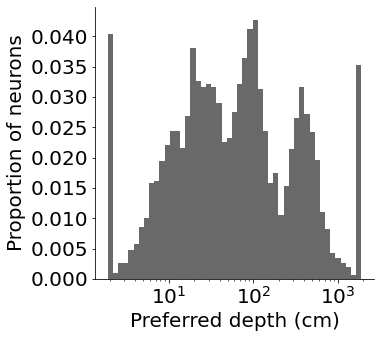

In [16]:
save_root = '/camp/lab/znamenskiyp/home/shared/presentations/Cosyne2023/ver'+str(VERSION)+'/preferred_depth_distribution/'
with open(save_root+'gaussian_fit_summary.pickle', 'rb') as handle:
    all_results = pickle.load(handle)

fontsize_dict = {
    'xlabel':20,
    'ylabel':20,
    'xticks':20,
    'yticks':20,
    'title':20,
    'legend':10
    }

plt.figure(figsize=(5,5))
depth_min = 1.9
depth_max = 1900
bin_num = 50
depth_bins = np.logspace(np.log(depth_min),np.log(depth_max),num=bin_num,base=np.e)
n, _, _ = plt.hist(all_results['preferred_depth_gaussian'], bins=depth_bins, weights=np.ones(len(all_results)) / len(all_results), color='dimgrey')
# plt.vlines(x=np.array(depth_list)*100,ymin=0,ymax=3/100,colors='r',linestyles='dashed')
plt.xscale('log')
plt.ylabel('Proportion of neurons', fontsize = fontsize_dict['ylabel'])
plt.xlabel('Preferred depth (cm)', fontsize = fontsize_dict['xlabel'])
plt.xticks(fontsize=fontsize_dict['xticks'])
plt.yticks(fontsize=fontsize_dict['yticks'])
despine()

plt.savefig(save_root+'hist_preferred_depth.pdf')